In [1]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로

train = pd.read_csv('/content/b_train.csv') # 훈련 데이터
test = pd.read_csv('/content/b_test.csv')   # 테스트 데이터
submission = pd.read_csv('/content/sampleSubmission.csv') # 제출 샘플 데이터

In [2]:
print(pd.__version__)

1.5.3


In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
# datetime 컬럼을 datetime로 형변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 분,초를 제외하고 연도, 월, 일, 시까지 잘라서 새로운 컬럼으로 넣기
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [11]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [10]:
# test도 train과 동일하게 적용
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [12]:
import calendar
from datetime import datetime

In [14]:
# 날짜별 요일 계산하기
# Create a new 'date' column that combines 'year', 'month', and 'day'
train['date'] = pd.to_datetime(train[['year', 'month', 'day']])

# Create a new 'weekday' column
train['weekday'] = train['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Drop the 'date' column as it's no longer needed
train = train.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [13]:
# test도 동일하게 적용
# Create a new 'date' column that combines 'year', 'month', and 'day'
test['date'] = pd.to_datetime(test[['year', 'month', 'day']])

# Create a new 'weekday' column
test['weekday'] = test['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])

# Drop the 'date' column as it's no longer needed
test = test.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday


In [15]:
# Drop the 'datetime' column
train = train.drop('datetime', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [16]:
# Drop the 'datetime' column
test = test.drop('datetime', axis=1)

# Check the first few rows of the dataframe to confirm the changes
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,Thursday
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,Thursday
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,Thursday
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,Thursday
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,Thursday


# 데이터 시각화

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

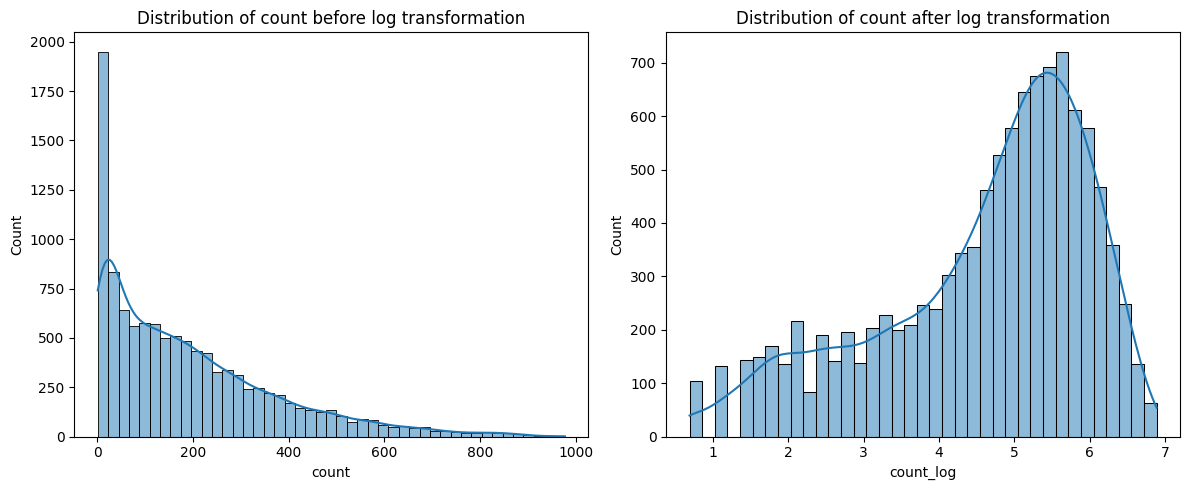

In [ ]:
# Plot the distribution of 'count' before the transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train['count'], kde=True)
plt.title('Distribution of count before log transformation')

# Apply the log transformation
train['count_log'] = np.log1p(train['count'])  # log 씌우기 -> 정규화

# Plot the distribution of 'count' after the transformation
plt.subplot(1, 2, 2)
sns.histplot(train['count_log'], kde=True)
plt.title('Distribution of count after log transformation')

plt.tight_layout()
plt.show()

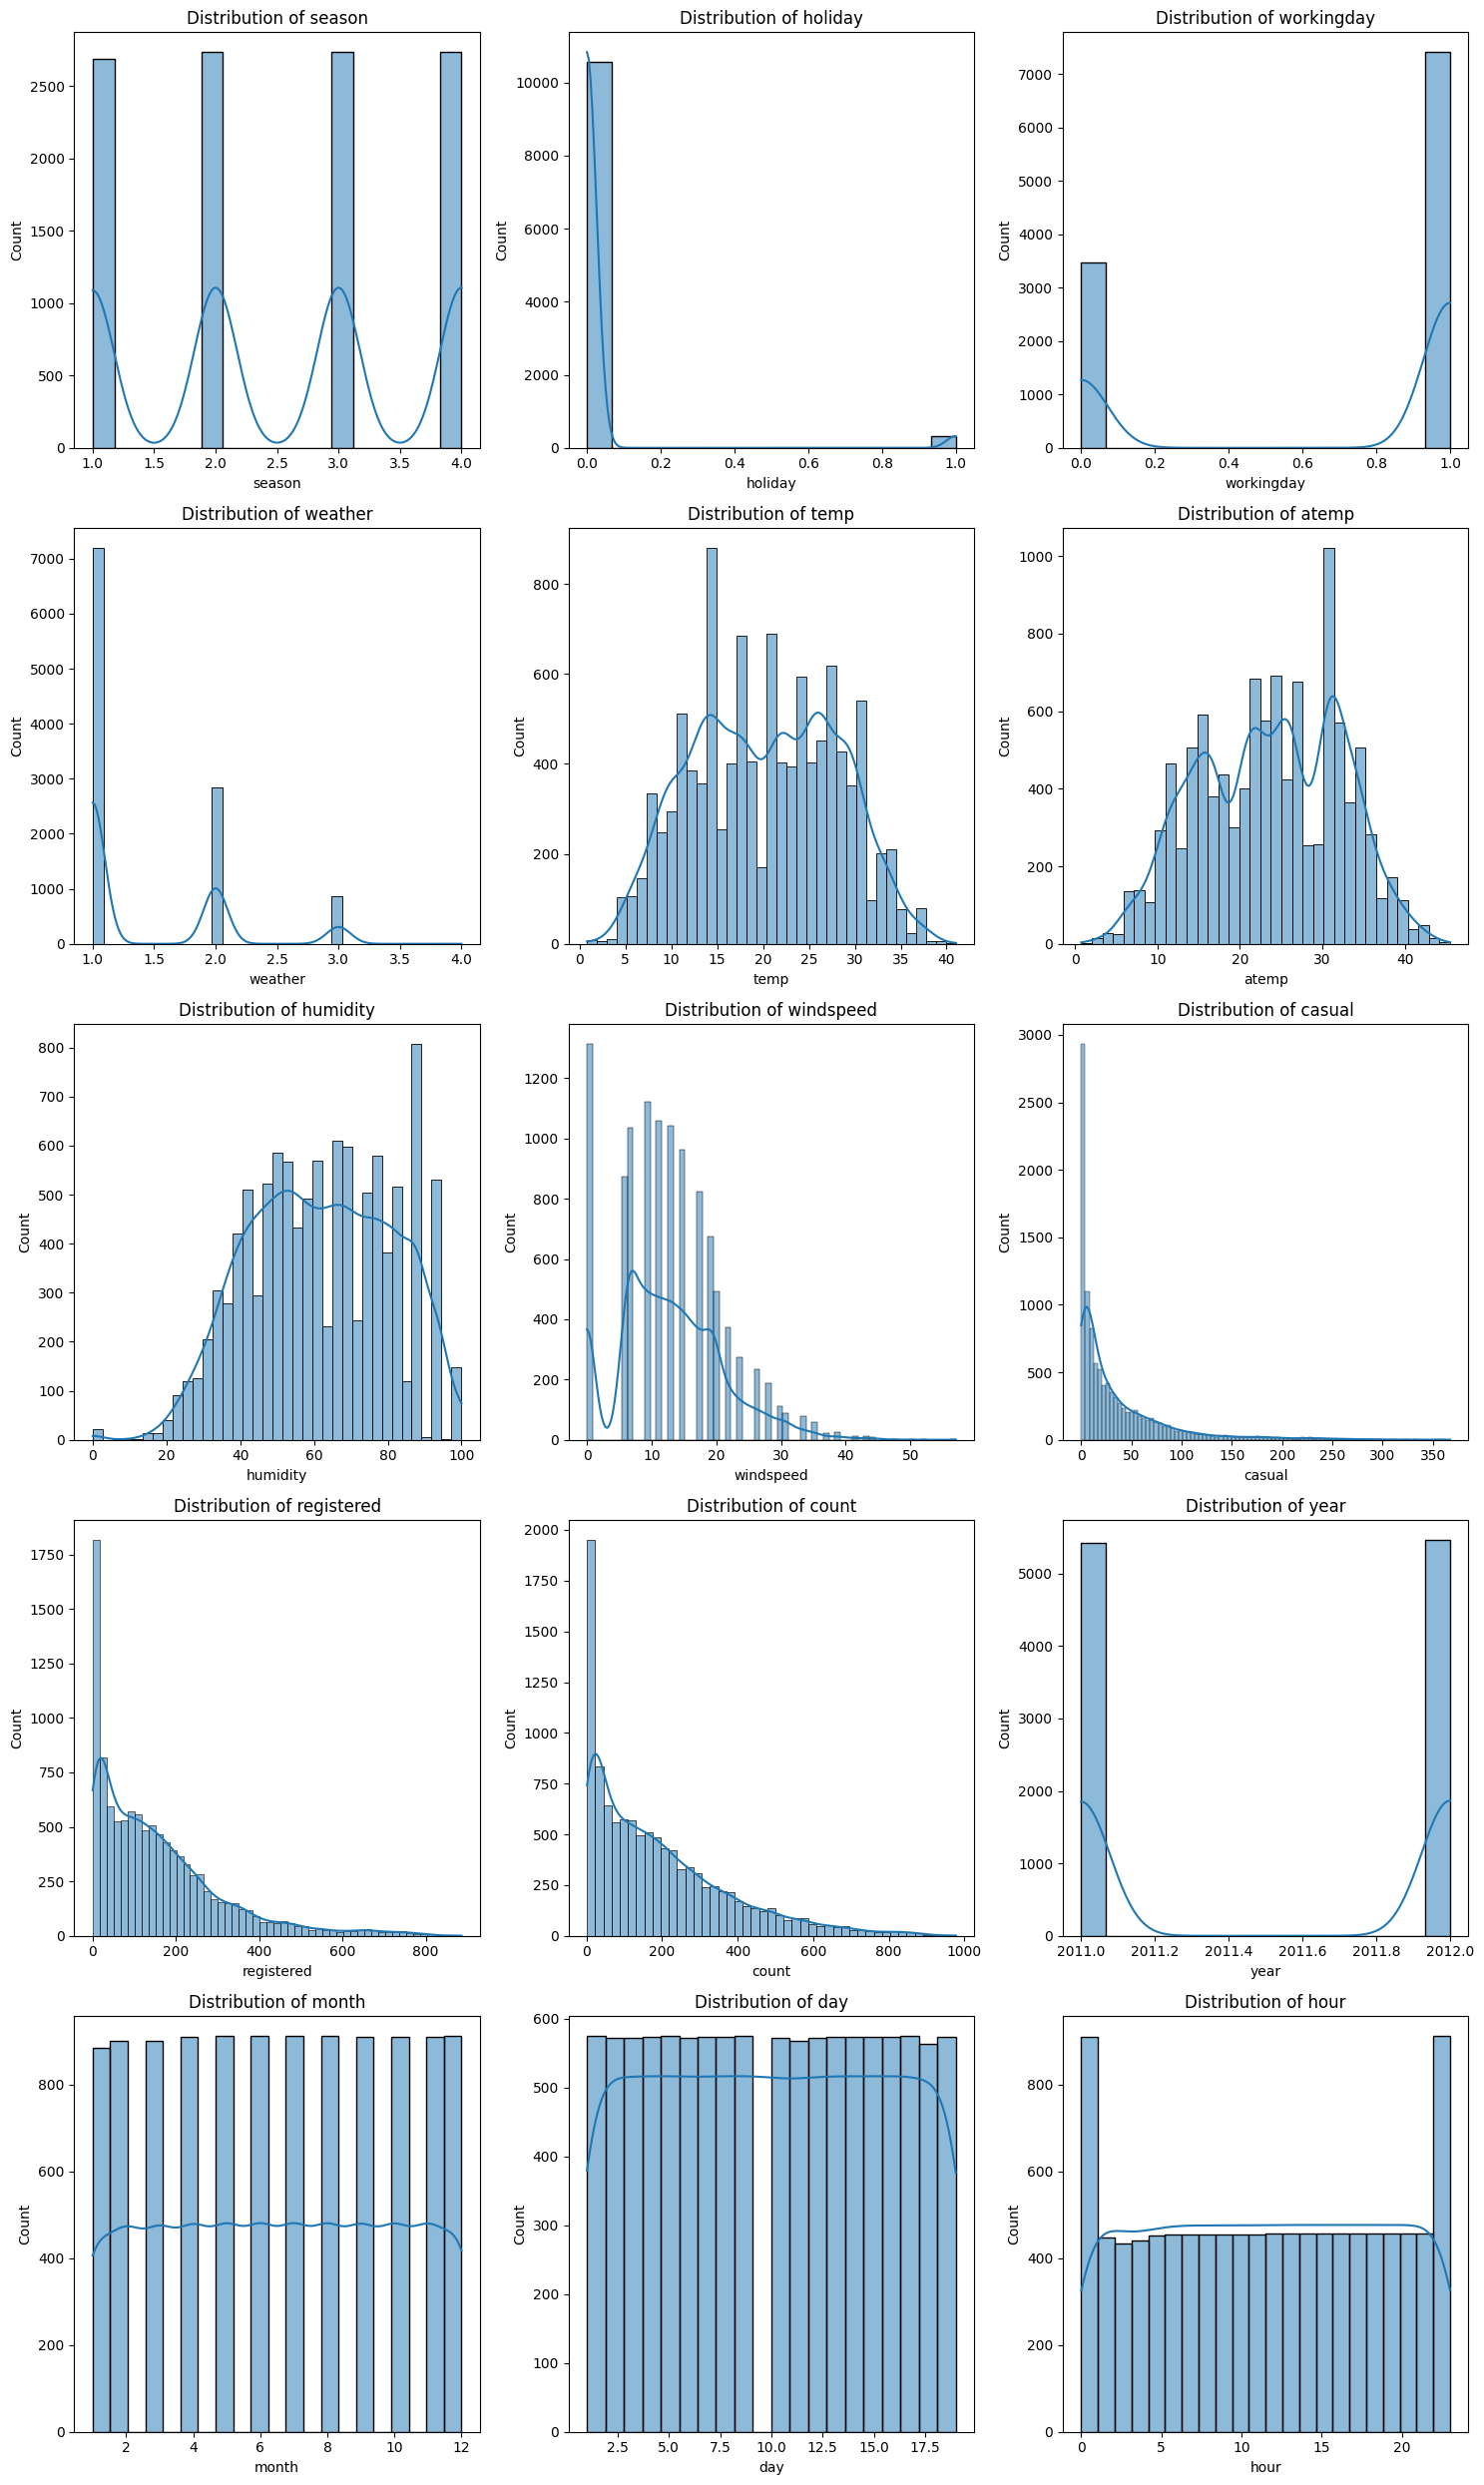

In [18]:
# Plot the distribution of all numeric columns
num_vars = train.select_dtypes(include=[np.number]).columns.tolist()

n = len(num_vars)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

for var, ax in zip(num_vars, axes.ravel()):
    sns.histplot(train[var], kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Working Day')]

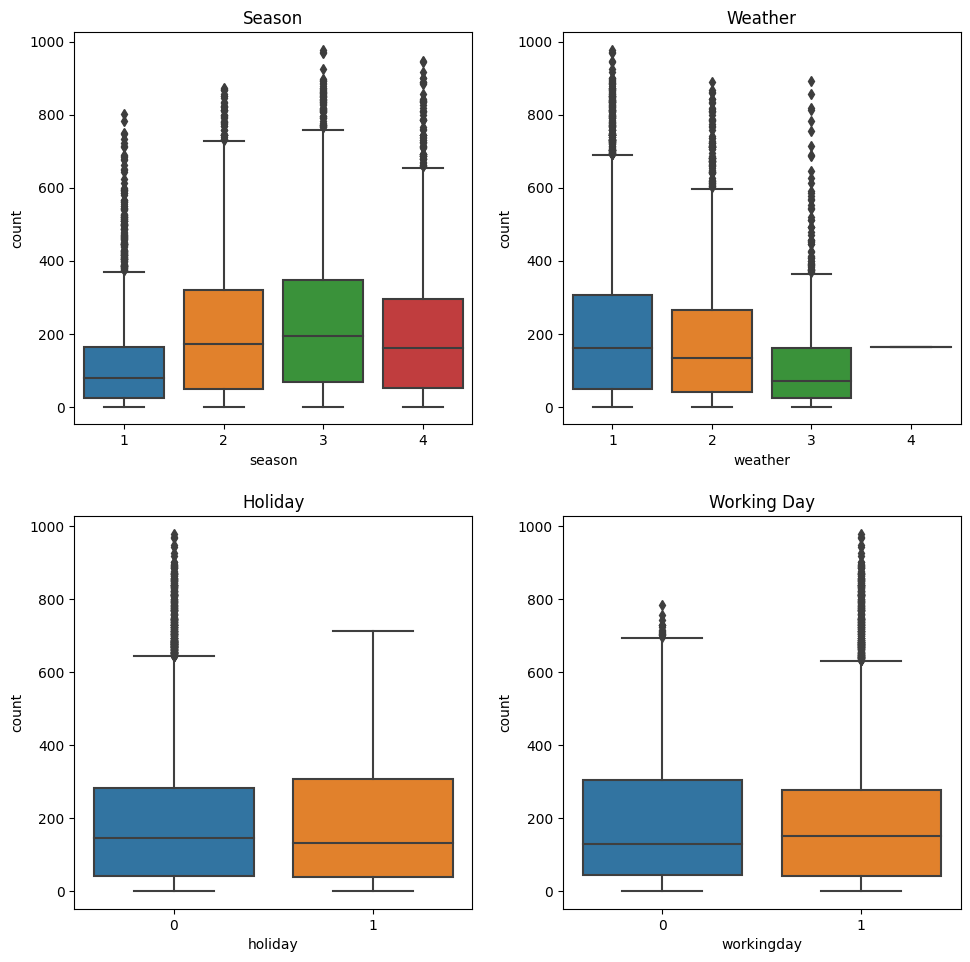

In [19]:
# Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

#서브플롯에 제목 달기
axes[0, 0].set(title='Season')
axes[0, 1].set(title='Weather')
axes[1, 0].set(title='Holiday')
axes[1, 1].set(title='Working Day')

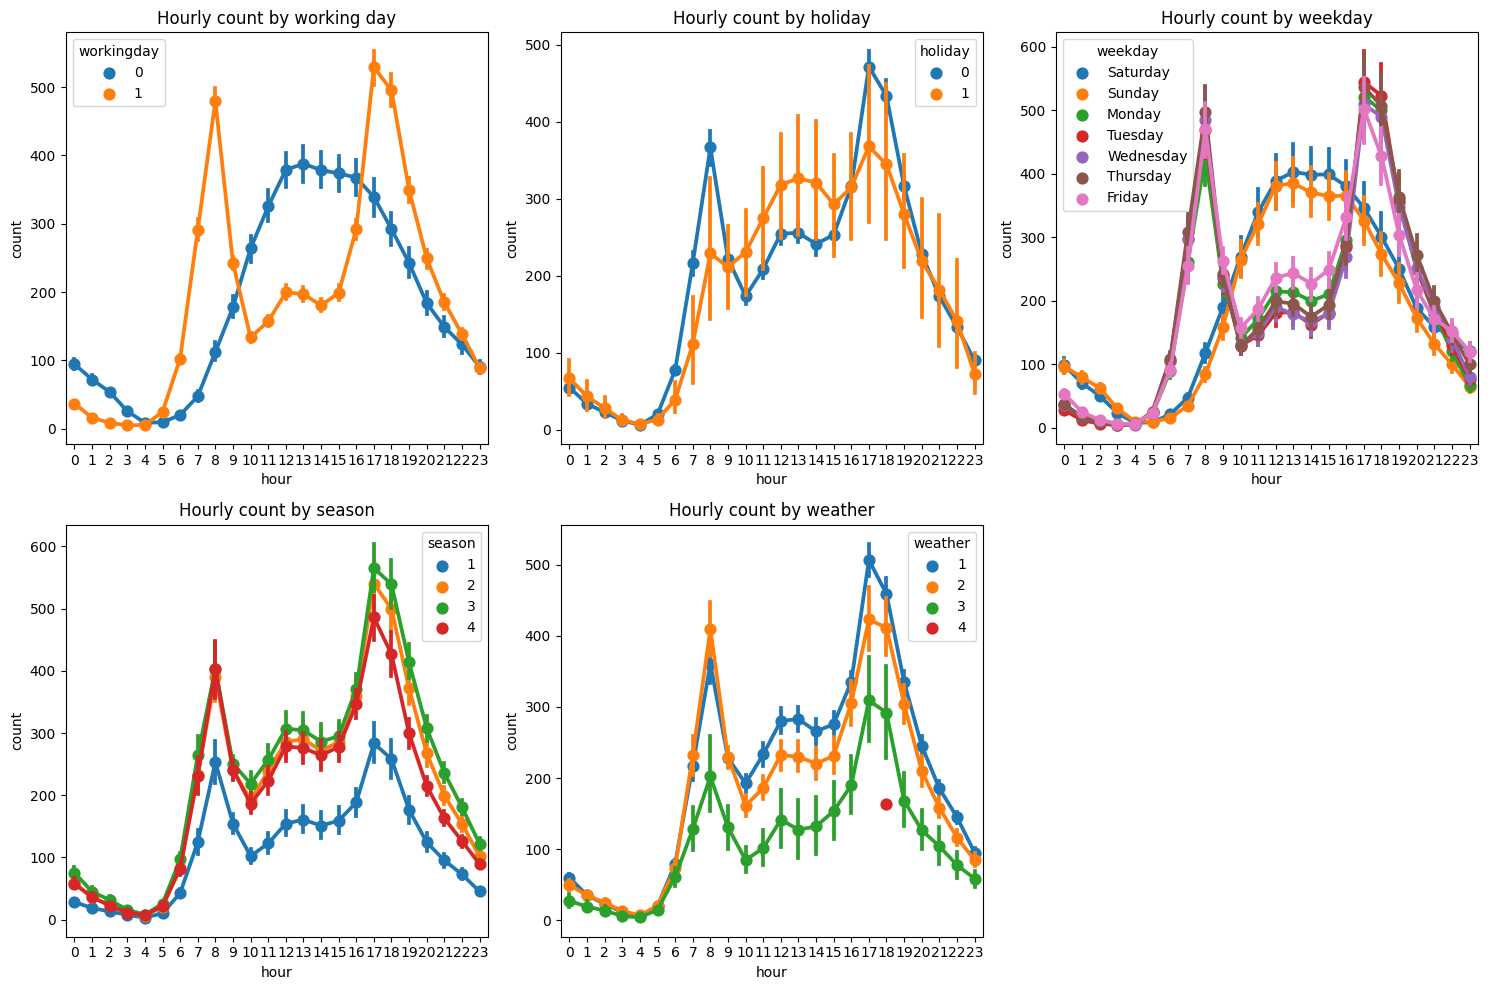

In [20]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create point plots for 'workingday', 'holiday', 'weekday', 'season', 'weather'
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0, 0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[0, 1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[0, 2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[1, 0])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[1, 1])

# Set the titles for the subplots
axes[0, 0].set_title('Hourly count by working day')
axes[0, 1].set_title('Hourly count by holiday')
axes[0, 2].set_title('Hourly count by weekday')
axes[1, 0].set_title('Hourly count by season')
axes[1, 1].set_title('Hourly count by weather')

# Remove the empty subplot
figure.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

In [21]:
train.corr()

<ipython-input-21-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540


<ipython-input-22-d5a81b3371bc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat = train.corr()


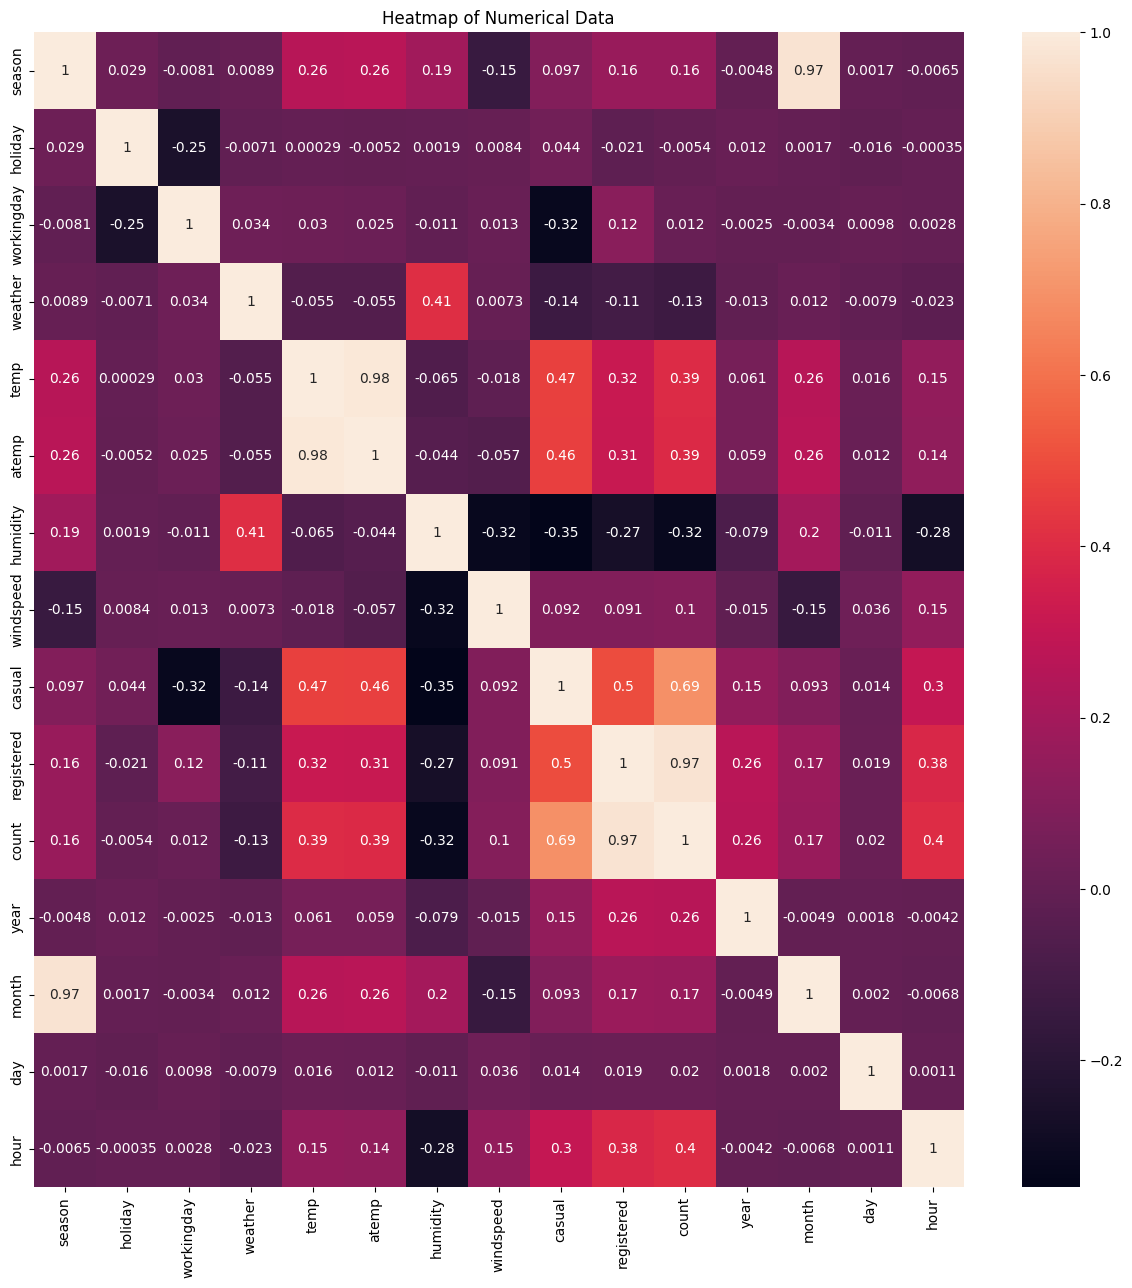

In [22]:
# 피처 간 상관관계 매트릭스
corrMat = train.corr()
fig, ax= plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

In [23]:
X_train = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                'humidity', 'windspeed','day', 'hour']]
y_train = train['count']

In [24]:
X_test = test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
                'humidity', 'windspeed','day', 'hour']]

In [25]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [26]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [27]:
log_y = np.log(y_train)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

In [28]:
coef = pd.Series(linear_reg_model.coef_, index = X_train.columns)
coef_sort = coef.sort_values(ascending = False)

<Axes: >

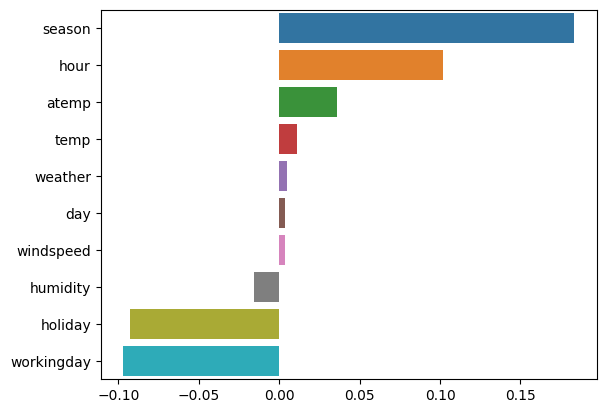

In [30]:
# 변수 중요도
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [31]:
preds = linear_reg_model.predict(X_train)

In [32]:
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0422


In [33]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장